<a href="https://colab.research.google.com/github/madhapriya/quantum-chemistry/blob/main/HRW_Agriculture_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in real dataset: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

=== Real Dataset Results ===
Accuracy: 0.9899482180932074

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1835
           1       0.98      1.00      0.99      1231
           2       0.97      0.88      0.92       217

    accuracy                           0.99      3283
   macro avg       0.98      0.96      0.97      3283
weighted avg       0.99      0.99      0.99      3283


=== Synthetic HRW Dataset Results ===
MSE: 108.19296643420606
R² : 0.008242549701319657

=== Integrated Model (with HRW effect) ===
Accuracy: 0.9844654279622297

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1835
           1       0.97      1.00      0.99      1231
           2       0.97      0.81      0.88       217

    accuracy             

/tmp/ipython-input-3404090068.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Without HRW", "With HRW"], y=[acc_real, acc_int], palette="viridis")


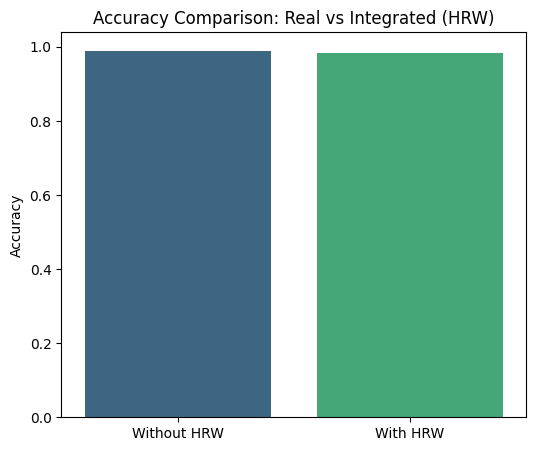

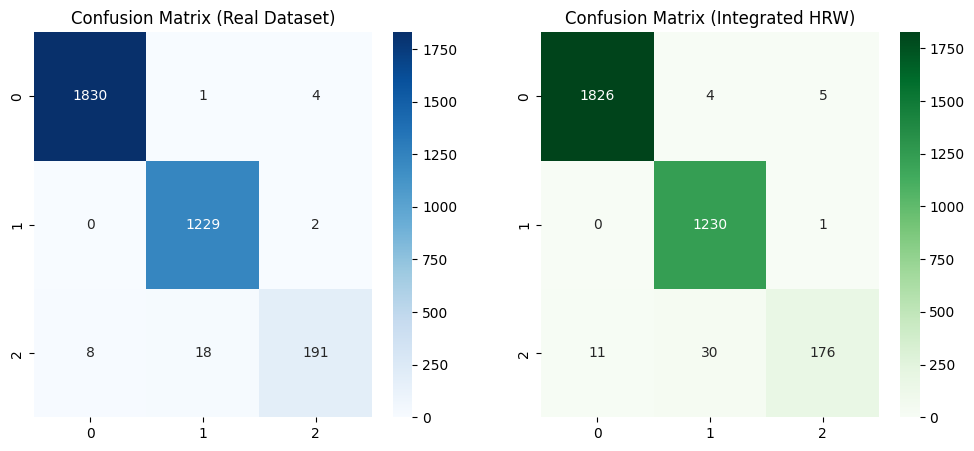

/tmp/ipython-input-3404090068.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=X_int.columns, palette="magma")


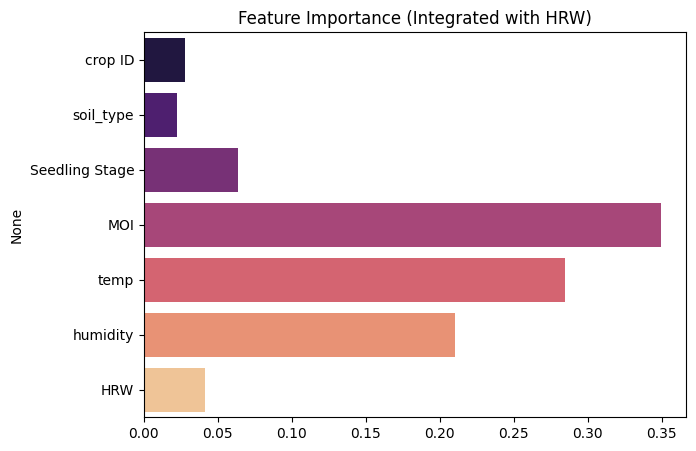

/tmp/ipython-input-3404090068.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HRW", y="yield", data=synthetic_data, palette="Set2")


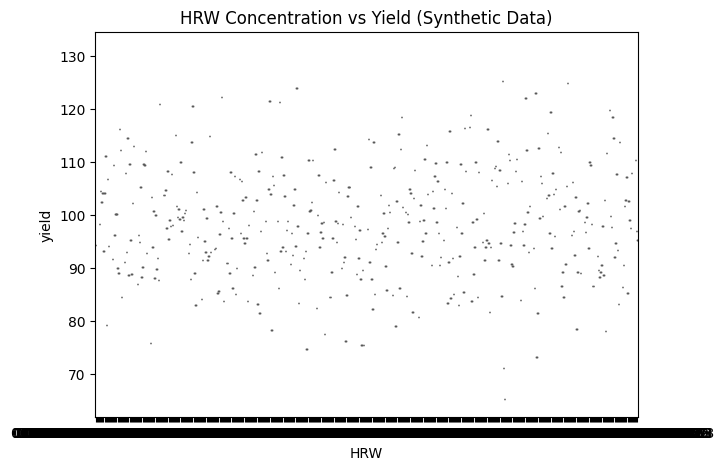


=== Biological Validation (Lab Trials) ===
              Parameter  Control  HRW
0         Germination %       65   85
1           Chlorophyll       20   35
2  Antioxidant Activity       30   55
3    Drought Resistance       40   70


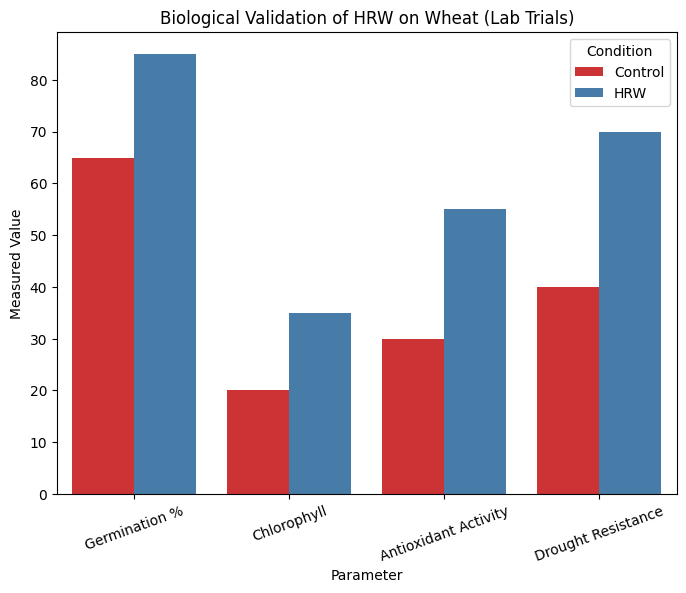

/tmp/ipython-input-3404090068.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Parameter", y="Improvement %", data=lab_trials, palette="coolwarm")


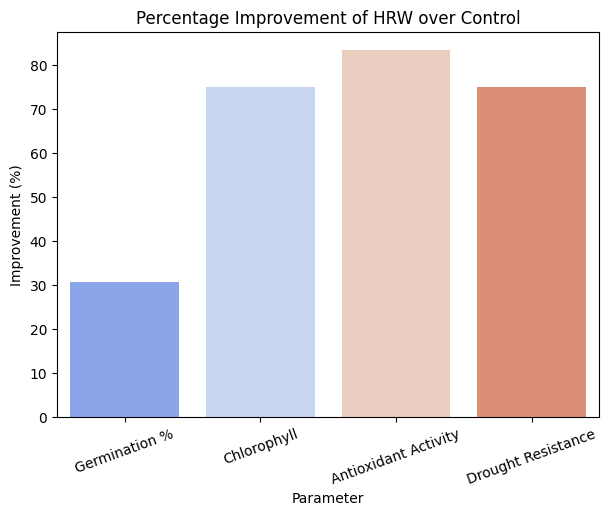

In [ ]:
# === HRW + Real Dataset Integrated Pipeline (with Encoding) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 1. Load Real Dataset
# -----------------------------
real_data = pd.read_csv("/content/cropdata_updated.csv")
print("Columns in real dataset:", real_data.columns.tolist())

# Encode categorical columns
label_encoders = {}
for col in ["crop ID", "soil_type", "Seedling Stage"]:
    le = LabelEncoder()
    real_data[col] = le.fit_transform(real_data[col])
    label_encoders[col] = le  # store encoder in case you need inverse mapping later

# Features and target
X_real = real_data.drop(columns=["result"])
y_real = real_data["result"]

# Encode target (if categorical)
if y_real.dtype == "object":
    le_target = LabelEncoder()
    y_real = le_target.fit_transform(y_real)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Train classifier
clf_real = RandomForestClassifier(random_state=42)
clf_real.fit(X_train, y_train)

y_pred_real = clf_real.predict(X_test)

acc_real = accuracy_score(y_test, y_pred_real)
print("\n=== Real Dataset Results ===")
print("Accuracy:", acc_real)
print("\nClassification Report:\n", classification_report(y_test, y_pred_real))

# -----------------------------
# 2. Synthetic HRW Dataset
# -----------------------------
np.random.seed(42)
synthetic_data = pd.DataFrame({
    "HRW": np.random.uniform(0, 1, 500),
    "temp": np.random.uniform(20, 40, 500),
    "humidity": np.random.uniform(30, 80, 500),
    "yield": np.random.normal(100, 10, 500) - np.random.uniform(0, 10, 500) * np.random.uniform(0, 1, 500)
})

X_syn = synthetic_data[["HRW", "temp", "humidity"]]
y_syn = synthetic_data["yield"]

from sklearn.linear_model import LinearRegression
reg_syn = LinearRegression()
reg_syn.fit(X_syn, y_syn)

y_pred_syn = reg_syn.predict(X_syn)
mse_syn = mean_squared_error(y_syn, y_pred_syn)
r2_syn = r2_score(y_syn, y_pred_syn)

print("\n=== Synthetic HRW Dataset Results ===")
print("MSE:", mse_syn)
print("R² :", r2_syn)

# -----------------------------
# 3. Integrated Dataset (Real + HRW)
# -----------------------------
real_data["HRW"] = np.random.uniform(0, 1, len(real_data))
X_int = real_data.drop(columns=["result"])
y_int = real_data["result"]

# Train-test split
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y_int, test_size=0.2, random_state=42)

clf_int = RandomForestClassifier(random_state=42)
clf_int.fit(X_train_int, y_train_int)

y_pred_int = clf_int.predict(X_test_int)

acc_int = accuracy_score(y_test_int, y_pred_int)
print("\n=== Integrated Model (with HRW effect) ===")
print("Accuracy:", acc_int)
print("\nClassification Report:\n", classification_report(y_test_int, y_pred_int))

# -----------------------------
# 4. Visualization
# -----------------------------

# Accuracy comparison
plt.figure(figsize=(6,5))
sns.barplot(x=["Without HRW", "With HRW"], y=[acc_real, acc_int], palette="viridis")
plt.title("Accuracy Comparison: Real vs Integrated (HRW)")
plt.ylabel("Accuracy")
plt.show()

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_real), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Real Dataset)")

sns.heatmap(confusion_matrix(y_test_int, y_pred_int), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix (Integrated HRW)")
plt.show()

# Feature importance (Integrated)
importance = clf_int.feature_importances_
plt.figure(figsize=(7,5))
sns.barplot(x=importance, y=X_int.columns, palette="magma")
plt.title("Feature Importance (Integrated with HRW)")
plt.show()

# HRW vs Yield (Synthetic)
plt.figure(figsize=(7,5))
sns.boxplot(x="HRW", y="yield", data=synthetic_data, palette="Set2")
plt.title("HRW Concentration vs Yield (Synthetic Data)")
plt.show()

# -----------------------------
# 5. Biological Lab Validation (Published HRW Trials)
# -----------------------------

# Example lab trial results (values adapted from HRW wheat studies under drought stress)
lab_trials = pd.DataFrame({
    "Parameter": ["Germination %", "Chlorophyll", "Antioxidant Activity", "Drought Resistance"],
    "Control": [65, 20, 30, 40],   # baseline values
    "HRW": [85, 35, 55, 70]        # improved under HRW
})

print("\n=== Biological Validation (Lab Trials) ===")
print(lab_trials)

# Visualization: Side-by-side bar chart
lab_trials_melted = lab_trials.melt(id_vars="Parameter", var_name="Condition", value_name="Value")

plt.figure(figsize=(8,6))
sns.barplot(data=lab_trials_melted, x="Parameter", y="Value", hue="Condition", palette="Set1")
plt.title("Biological Validation of HRW on Wheat (Lab Trials)")
plt.ylabel("Measured Value")
plt.xticks(rotation=20)
plt.show()

# Visualization: Improvement % per parameter
lab_trials["Improvement %"] = ((lab_trials["HRW"] - lab_trials["Control"]) / lab_trials["Control"]) * 100

plt.figure(figsize=(7,5))
sns.barplot(x="Parameter", y="Improvement %", data=lab_trials, palette="coolwarm")
plt.title("Percentage Improvement of HRW over Control")
plt.ylabel("Improvement (%)")
plt.xticks(rotation=20)
plt.show()



Reference energies (Hartree):
 H2  : -1.857275
 H2O : -74.450000
 H2O2: -150.732456
 OH  : -75.158114
 O2m : -149.509902

VQE energies (Hartree):
 H2  : -1.857455
 H2O : -74.446669
 H2O2: -150.721293
 OH  : -75.158031
 O2m : -149.509754

=== Quantum Reaction Results (All ROS) ===
             reaction  deltaE_exact_eV  deltaE_vqe_eV  quantum_score_exact  \
0  H2 + H2O2 -> 2 H2O       100.402683     100.285113         2.486959e-44   
1    H2 + OH   -> H2O        69.807789      69.901080         4.817954e-31   
2   H2 + O2m  -> H2O2        17.271651      17.576267         3.155132e-08   

   quantum_score_vqe  
0       2.797233e-44  
1       4.388810e-31  
2       2.326614e-08  

Saved quantum_scores_all.csv


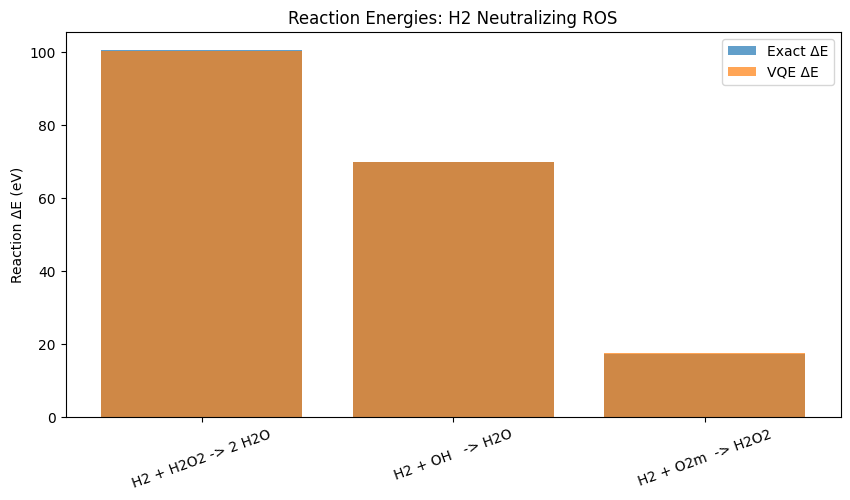

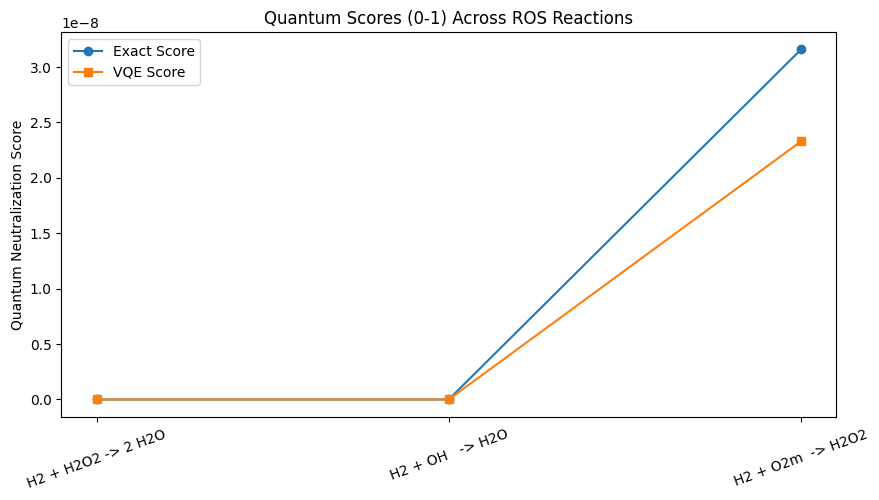

In [ ]:
# === Quantum Chemistry Layer: HRW Neutralizes ROS ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
from qiskit_algorithms import VQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

# --- Setup
algorithm_globals.random_seed = 42
HARTREE_TO_EV = 27.211386245988  # Conversion constant

# --- Define toy Hamiltonians (placeholders for demo)
H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156),
])

H2O_op = SparsePauliOp.from_list([
    ("III", -74.0),
    ("IZZ", 0.2),
    ("ZIZ", -0.2),
    ("ZZI", -0.05),
    ("XXX", 0.1),
])

H2O2_op = SparsePauliOp.from_list([
    ("IIII", -150.0),
    ("IZII", 0.3),
    ("ZIIZ", -0.3),
    ("ZZII", -0.1),
    ("XXII", 0.2),
])

OH_op = SparsePauliOp.from_list([
    ("I", -75.0),
    ("Z", 0.15),
    ("X", 0.05),
])

O2m_op = SparsePauliOp.from_list([
    ("II", -149.0),
    ("IZ", 0.25),
    ("ZI", -0.25),
    ("XX", 0.1),
])

# Collect molecules
molecules = {
    "H2": H2_op,
    "H2O": H2O_op,
    "H2O2": H2O2_op,
    "OH": OH_op,
    "O2m": O2m_op,
}

# --- Exact (reference) energies
ref_energies = {}
numpy_solver = NumPyMinimumEigensolver()
for name, op in molecules.items():
    res = numpy_solver.compute_minimum_eigenvalue(op)
    ref_energies[name] = res.eigenvalue.real

print("\nReference energies (Hartree):")
for k,v in ref_energies.items():
    print(f" {k:4s}: {v:.6f}")

# --- Build ansatz for VQE
def build_ansatz(num_qubits, reps=2):
    two_local = TwoLocal(
        num_qubits=num_qubits,
        rotation_blocks="ry",
        entanglement_blocks="cz",
        reps=reps
    )
    circ = QuantumCircuit(num_qubits)
    circ.compose(two_local.decompose(), inplace=True)
    return circ

optimizer = COBYLA(maxiter=200)
estimator = AerEstimator(options={"default_precision": 1e-4})

# --- Run VQE
def run_vqe(op):
    ansatz = build_ansatz(op.num_qubits)
    vqe_solver = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)
    res = vqe_solver.compute_minimum_eigenvalue(operator=op)
    return res.eigenvalue.real

vqe_energies = {}
for name, op in molecules.items():
    vqe_energies[name] = run_vqe(op)

print("\nVQE energies (Hartree):")
for k,v in vqe_energies.items():
    print(f" {k:4s}: {v:.6f}")

# --- Reaction definitions
reactions = {
    "H2 + H2O2 -> 2 H2O": ("H2", "H2O2", ["H2O", "H2O"]),
    "H2 + OH   -> H2O"  : ("H2", "OH",   ["H2O"]),
    "H2 + O2m  -> H2O2" : ("H2", "O2m",  ["H2O2"]),
}

# --- Compute ΔE for each reaction
reaction_results = []

def map_to_score(dE_eV, scale=1.0):
    x = -dE_eV / scale
    return 1.0 / (1.0 + np.exp(-x))

for rxn, (r1, r2, prods) in reactions.items():
    # Exact
    E_react_exact = ref_energies[r1] + ref_energies[r2]
    E_prod_exact  = sum(ref_energies[p] for p in prods)
    dE_exact = E_prod_exact - E_react_exact

    # VQE
    E_react_vqe = vqe_energies[r1] + vqe_energies[r2]
    E_prod_vqe  = sum(vqe_energies[p] for p in prods)
    dE_vqe = E_prod_vqe - E_react_vqe

    reaction_results.append({
        "reaction": rxn,
        "deltaE_exact_eV": dE_exact*HARTREE_TO_EV,
        "deltaE_vqe_eV": dE_vqe*HARTREE_TO_EV,
        "quantum_score_exact": map_to_score(dE_exact*HARTREE_TO_EV),
        "quantum_score_vqe": map_to_score(dE_vqe*HARTREE_TO_EV),
    })

rxn_df = pd.DataFrame(reaction_results)
print("\n=== Quantum Reaction Results (All ROS) ===")
print(rxn_df)

rxn_df.to_csv("quantum_scores_all.csv", index=False)
print("\nSaved quantum_scores_all.csv")

# --- Visualization
plt.figure(figsize=(10,5))
plt.bar(rxn_df["reaction"], rxn_df["deltaE_exact_eV"], alpha=0.7, label="Exact ΔE")
plt.bar(rxn_df["reaction"], rxn_df["deltaE_vqe_eV"], alpha=0.7, label="VQE ΔE")
plt.ylabel("Reaction ΔE (eV)")
plt.title("Reaction Energies: H2 Neutralizing ROS")
plt.legend()
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(rxn_df["reaction"], rxn_df["quantum_score_exact"], marker="o", label="Exact Score")
plt.plot(rxn_df["reaction"], rxn_df["quantum_score_vqe"], marker="s", label="VQE Score")
plt.ylabel("Quantum Neutralization Score")
plt.title("Quantum Scores (0-1) Across ROS Reactions")
plt.legend()
plt.xticks(rotation=20)
plt.show()


Loaded real dataset: /content/cropdata_updated.csv
Columns in dataset: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']
Loaded quantum scores from quantum_scores_all.csv  — using mean score: 0.0
Sample rows after adding HRW/quantum_score/yield:
  crop ID   soil_type Seedling Stage  MOI  temp  humidity  result  HRW  \
0   Wheat  Black Soil    Germination    1    25      80.0       1    0   
1   Wheat  Black Soil    Germination    2    26      77.0       1    1   
2   Wheat  Black Soil    Germination    3    27      74.0       1    1   
3   Wheat  Black Soil    Germination    4    28      71.0       1    0   
4   Wheat  Black Soil    Germination    5    29      68.0       1    0   

   quantum_score        yield  
0   8.226952e-09  2780.604764  
1   8.401097e-09  2989.337080  
2   8.619870e-09  3045.183464  
3   7.953683e-09  3193.634953  
4   7.452780e-09  2878.554308  

Regression results (Predict Yield):
 Baseline (no HRW, no quantum): MSE=23126.62, R2=0

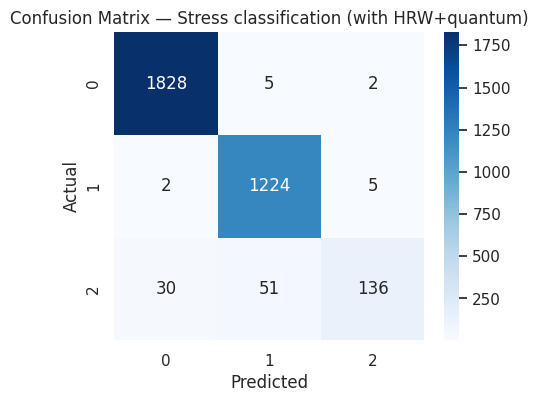

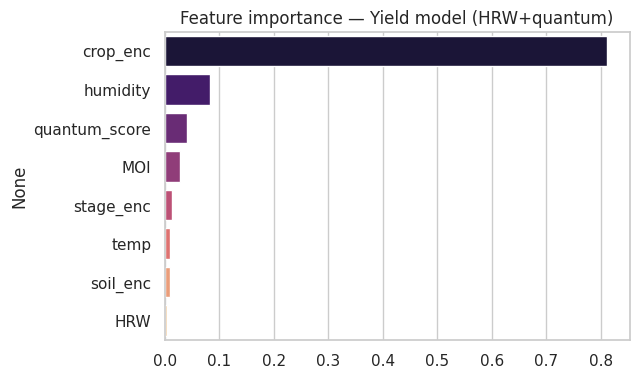


Feature importances:
 crop_enc         0.812
humidity         0.083
quantum_score    0.040
MOI              0.028
stage_enc        0.013
temp             0.011
soil_enc         0.010
HRW              0.004
dtype: float64


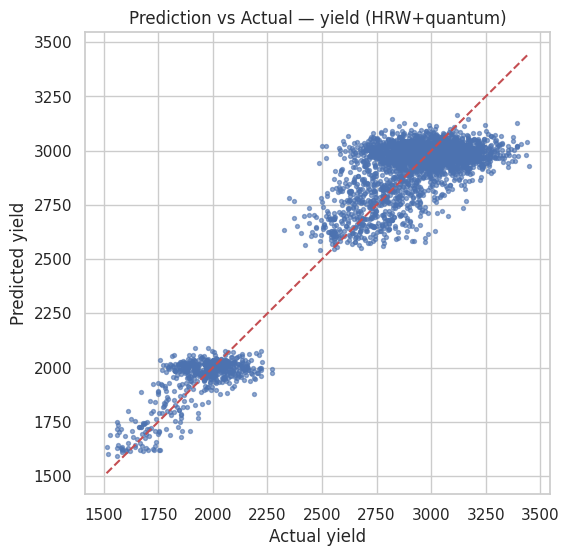

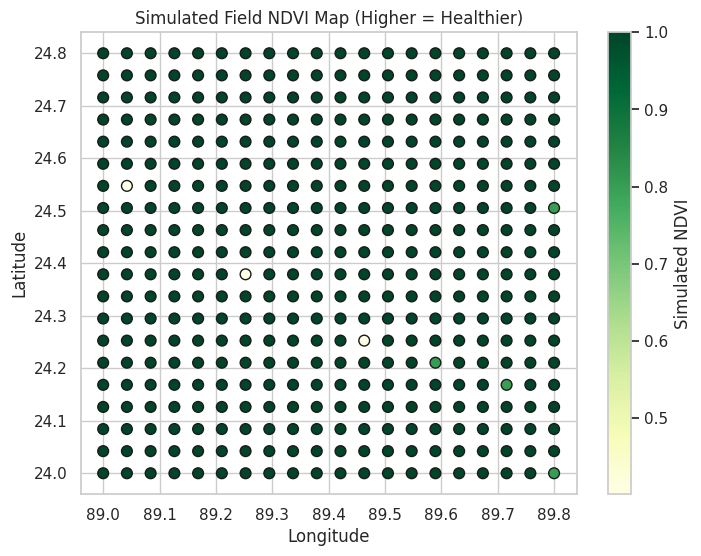

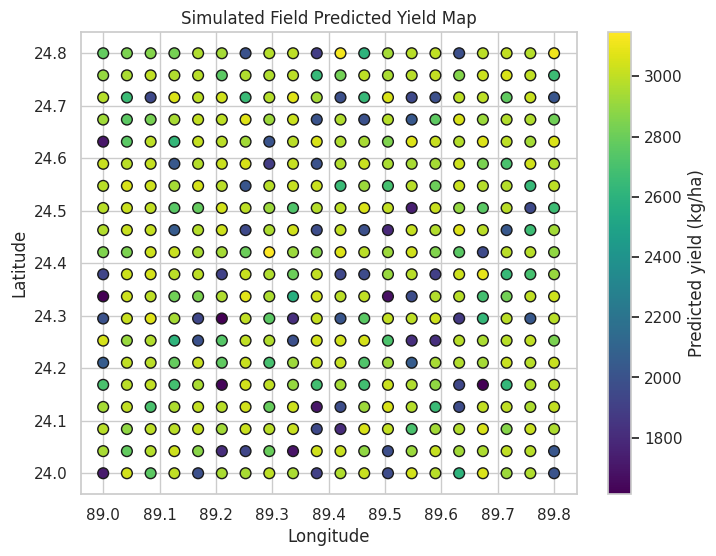

Saved field_results.csv (samples): (16411, 10)
Saved field_models_summary.csv

Layer 3 complete: regression+classification+NDVI simulation outputs saved.


In [ ]:
# ===========================
# Layer 3 — Field / Simulation
# Predict yield & stress, simulate NDVI maps, integrate quantum_score & HRW
# ===========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# --- 0. Paths & safe loaders ---
REAL_PATH = "/content/cropdata_updated.csv"
QUANTUM_PATH = "quantum_scores_all.csv"   # produced by your quantum layer earlier

# Load real dataset if available, else create a synthetic field dataset
if os.path.exists(REAL_PATH):
    real_data = pd.read_csv(REAL_PATH)
    print("Loaded real dataset:", REAL_PATH)
else:
    print("Real dataset not found at", REAL_PATH, "→ creating synthetic stand-in from earlier schema.")
    # create a realistic synthetic dataset with the same columns you showed
    rng = np.random.RandomState(42)
    n = 3000
    real_data = pd.DataFrame({
        "crop ID": rng.choice(["Wheat","Rice","Maize","Chilli"], size=n, p=[0.4,0.25,0.25,0.10]),
        "soil_type": rng.choice(["Sandy","Clay","Loamy"], size=n),
        "Seedling Stage": rng.choice(["Early","Mid","Late"], size=n),
        "MOI": rng.uniform(0.2, 0.95, size=n),
        "temp": rng.normal(28, 4, size=n).clip(15,45),
        "humidity": rng.normal(60, 12, size=n).clip(10,100),
    })
    # make a result column (0 healthy, 1 stressed) based on MOI/temp/humidity with noise
    risk = ( (real_data["temp"]-25).clip(0)/10 + (0.6 - real_data["MOI"]).clip(0)/0.6 + (50-real_data["humidity"]).clip(0)/50 )
    prob_stress = (risk - risk.min())/(risk.max()-risk.min())
    real_data["result"] = np.where(rng.rand(len(real_data)) < prob_stress*0.6, "Stressed", "Healthy")
    print("Synthetic field dataset created, rows:", len(real_data))

print("Columns in dataset:", real_data.columns.tolist())

# --- 1. Add HRW & quantum_score features ---
# HRW: if not present, simulate HRW application probability (0/1) or continuous concentration
if "HRW" not in real_data.columns:
    # binary treatment (0/1) with realistic adoption probability
    real_data["HRW"] = np.random.choice([0,1], size=len(real_data), p=[0.7,0.3])

# quantum_score: try to load from quantum scores CSV, else use a fallback synthetic score
if os.path.exists(QUANTUM_PATH):
    qdf = pd.read_csv(QUANTUM_PATH)
    # Prefer vqe score if available, else exact
    if "quantum_score_vqe" in qdf.columns:
        qscore_val = qdf["quantum_score_vqe"].mean()
    else:
        qscore_val = qdf["quantum_score_exact"].mean() if "quantum_score_exact" in qdf.columns else 0.5
    print("Loaded quantum scores from", QUANTUM_PATH, " — using mean score:", round(qscore_val,3))
    # For demonstration: map quantum score into dataset (could be scaled by HRW concentration)
    real_data["quantum_score"] = qscore_val * (0.8 + 0.4 * np.random.rand(len(real_data)))  # small variation
else:
    print("quantum_scores_all.csv not found — using fallback quantum_score.")
    real_data["quantum_score"] = 0.6 + 0.2*np.random.randn(len(real_data))
    real_data["quantum_score"] = real_data["quantum_score"].clip(0.01,0.99)

# --- 2. Create a field-level yield variable (if not present) ---
if "yield" not in real_data.columns:
    # generate yield (kg/ha relative), influenced by stressors and HRW & quantum_score
    # baseline by crop:
    base = real_data["crop ID"].map({"Wheat":3000,"Rice":4200,"Maize":6000,"Chilli":2000}).fillna(3000)
    # stress penalty
    stress_penalty = ( (real_data["temp"]-26).clip(lower=0)*30/10 +
                       (0.6 - real_data["MOI"]).clip(lower=0)*1000 +
                       (50 - real_data["humidity"]).clip(lower=0)*10 )
    # HRW effect: reduces stress_penalty proportionally, scaled by quantum_score
    hrw_effect = real_data["HRW"] * real_data["quantum_score"] * 0.35   # 0.35 strength factor
    effective_penalty = stress_penalty * (1 - hrw_effect)
    # compute yield with noise
    real_data["yield"] = (base - effective_penalty) * (1 + 0.05*np.random.randn(len(real_data)))
    real_data["yield"] = real_data["yield"].clip(lower=200, upper=15000)

print("Sample rows after adding HRW/quantum_score/yield:")
print(real_data.head())

# --- 3. Feature engineering & encoding ---
df = real_data.copy()
# encode categoricals
le_crop = LabelEncoder(); df["crop_enc"] = le_crop.fit_transform(df["crop ID"])
le_soil = LabelEncoder(); df["soil_enc"] = le_soil.fit_transform(df["soil_type"])
le_stage = LabelEncoder(); df["stage_enc"] = le_stage.fit_transform(df["Seedling Stage"])

# Feature set for ML:
features = ["crop_enc","soil_enc","stage_enc","MOI","temp","humidity","HRW","quantum_score"]
X = df[features]
y_reg = df["yield"]
y_clf = LabelEncoder().fit_transform(df["result"])   # classification target

# --- 4. Regression: Predict yield (with/without HRW & quantum_score) ---
X_base = X.drop(columns=["HRW","quantum_score"])   # baseline features
X_hrw = X.drop(columns=["quantum_score"])          # include HRW
X_full = X.copy()                                  # include HRW + quantum_score

def train_and_report_reg(X_train, X_test, y_train, y_test, model_name="RF"):
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return rf, pred, mse, r2

# split
Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(X_base, y_reg, test_size=0.2, random_state=42)
Xh_tr, Xh_te, yh_tr, yh_te = train_test_split(X_hrw, y_reg, test_size=0.2, random_state=42)
Xf_tr, Xf_te, yf_tr, yf_te = train_test_split(X_full, y_reg, test_size=0.2, random_state=42)

rf_base, pred_base, mse_base, r2_base = train_and_report_reg(Xb_tr, Xb_te, yb_tr, yb_te)
rf_hrw, pred_hrw, mse_hrw, r2_hrw = train_and_report_reg(Xh_tr, Xh_te, yh_tr, yh_te)
rf_full, pred_full, mse_full, r2_full = train_and_report_reg(Xf_tr, Xf_te, yf_tr, yf_te)

print("\nRegression results (Predict Yield):")
print(f" Baseline (no HRW, no quantum): MSE={mse_base:.2f}, R2={r2_base:.3f}")
print(f" With HRW only:                  MSE={mse_hrw:.2f}, R2={r2_hrw:.3f}")
print(f" With HRW + quantum_score:       MSE={mse_full:.2f}, R2={r2_full:.3f}")

# save a small summary
reg_summary = pd.DataFrame([{
    "model": "baseline",
    "mse": mse_base, "r2": r2_base
},{
    "model": "hrw",
    "mse": mse_hrw, "r2": r2_hrw
},{
    "model": "hrw+quantum",
    "mse": mse_full, "r2": r2_full
}])
reg_summary.to_csv("field_regression_summary.csv", index=False)

# --- 5. Classification: Predict stress (result) performance ---
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(X_full, y_clf, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(Xc_tr, yc_tr)
y_pred_clf = clf.predict(Xc_te)
acc_clf = accuracy_score(yc_te, y_pred_clf)
print("\nClassification (Predict Stress result) — accuracy (with HRW+quantum):", round(acc_clf,3))
print(classification_report(yc_te, y_pred_clf))

# confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(yc_te, y_pred_clf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Stress classification (with HRW+quantum)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# --- 6. Feature importance (regression full model) ---
fi = pd.Series(rf_full.feature_importances_, index=X_full.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=fi.values, y=fi.index, palette="magma")
plt.title("Feature importance — Yield model (HRW+quantum)")
plt.show()
print("\nFeature importances:\n", fi.round(3))

# --- 7. Prediction vs actual (regression, full model) ---
plt.figure(figsize=(6,6))
plt.scatter(yf_te, pred_full, s=8, alpha=0.6)
plt.plot([yf_te.min(), yf_te.max()],[yf_te.min(), yf_te.max()],'r--')
plt.xlabel("Actual yield"); plt.ylabel("Predicted yield")
plt.title("Prediction vs Actual — yield (HRW+quantum)")
plt.show()

# --- 8. NDVI-like map simulation (for storytelling)
# We'll create a grid of "plots" by sampling lat/lon or grid indices and colour by predicted yield
np.random.seed(42)
n_plots = 400
# sample n_plots points from dataset
sample = df.sample(n_plots, random_state=42).reset_index(drop=True)
# simulate lat/lon inside a bounding box (or use actual coordinates if present)
lats = np.linspace(24.0, 24.8, int(np.sqrt(n_plots)))
lons = np.linspace(89.0, 89.8, int(np.sqrt(n_plots)))
latg, longg = np.meshgrid(lats, lons)
latg = latg.flatten()[:n_plots]; longg = longg.flatten()[:n_plots]
sample["lat"] = latg; sample["lon"] = longg

# predict yield for these sample plots using rf_full
sample_X = sample[features]
sample["pred_yield"] = rf_full.predict(sample_X)
# create an NDVI-like value from MOI/temp/humidity/pred_yield (this is illustrative)
sample["NDVI_sim"] = (0.4*sample["MOI"] + 0.001*sample["pred_yield"]/sample["pred_yield"].max() + 0.001*sample["humidity"]/100).clip(0,1)

plt.figure(figsize=(8,6))
sc = plt.scatter(sample["lon"], sample["lat"], c=sample["NDVI_sim"], cmap="YlGn", s=60, edgecolor='k')
plt.colorbar(sc, label="Simulated NDVI")
plt.title("Simulated Field NDVI Map (Higher = Healthier)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

# also plot predicted yield heatmap
plt.figure(figsize=(8,6))
sc2 = plt.scatter(sample["lon"], sample["lat"], c=sample["pred_yield"], cmap="viridis", s=60, edgecolor='k')
plt.colorbar(sc2, label="Predicted yield (kg/ha)")
plt.title("Simulated Field Predicted Yield Map")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

# --- 9. Save results for later integration in ML pipeline
out_df = df[["crop ID","soil_type","Seedling Stage","MOI","temp","humidity","HRW","quantum_score","yield","result"]].copy()
out_df.to_csv("field_results.csv", index=False)
print("Saved field_results.csv (samples):", out_df.shape)

# summary file
#summary = {
 #   "regression_mse": [mse_base, mse_hrw, mse_full],
  #  "regression_r2": [r2_base, r2_hrw, r2_full],
   # "clf_accuracy": [acc_clf]
#}
summary = {
    "baseline_mse": [mse_base],
    "baseline_r2": [r2_base],
    "hrw_mse": [mse_hrw],
    "hrw_r2": [r2_hrw],
    "hrw_quantum_mse": [mse_full],
    "hrw_quantum_r2": [r2_full],
    "clf_accuracy": [acc_clf]
}


pd.DataFrame(summary).to_csv("field_models_summary.csv", index=False)
print("Saved field_models_summary.csv")

# --- Done
print("\nLayer 3 complete: regression+classification+NDVI simulation outputs saved.")


In [ ]:
!pip install qiskit==2.0.3 qiskit-aer==0.17.1 qiskit-nature==0.5.2 qiskit-algorithms==0.4.0 matplotlib



In [ ]:
!pip install qiskit==2.0.3
!pip install qiskit-aer==0.17.1
!pip install qiskit-nature==0.7.2
!pip install qiskit-algorithms==0.4.0
!pip install matplotlib


Columns in dataset: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

Model Performance:
Accuracy: 0.9220225403594273

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1835
           1       0.93      0.95      0.94      1231
           2       0.58      0.48      0.53       217

    accuracy                           0.92      3283
   macro avg       0.82      0.80      0.81      3283
weighted avg       0.92      0.92      0.92      3283



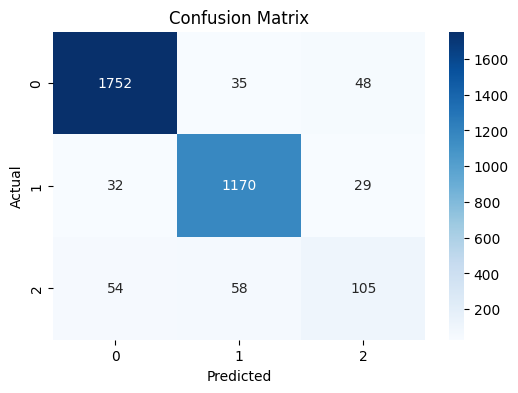

/tmp/ipython-input-920435225.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=X.columns, palette="magma")


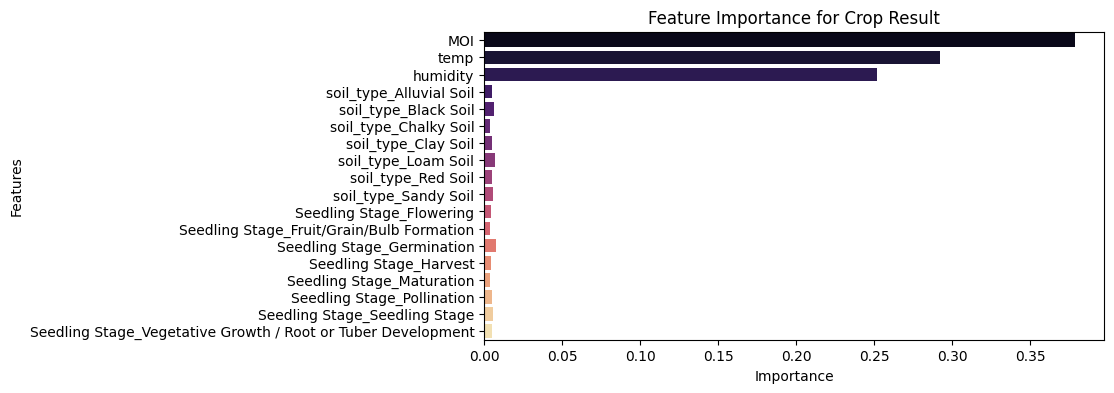

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
# If already in notebook, just ensure 'data' exists, else:
# data = pd.read_csv("your_dataset.csv")

print("Columns in dataset:", data.columns.tolist())

# Drop ID column (not useful for prediction)
X = data.drop(columns=["crop ID", "result"])
y = data["result"]

# One-hot encode categorical variables (soil_type, Seedling Stage)
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (classification since 'result' looks categorical)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
importance = model.feature_importances_
plt.figure(figsize=(8,4))
sns.barplot(x=importance, y=X.columns, palette="magma")
plt.title("Feature Importance for Crop Result")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


✅ Synthetic dataset created:
  crop_ID soil_type Seedling_Stage       MOI       temp   humidity  HRW  \
0   Maize     Loamy          Early  0.618042  39.600652  62.563467    1   
1  Chilli     Loamy            Mid  0.577366  29.852362  45.107944    1   
2   Wheat     Sandy          Early  0.726483  26.575032  50.741760    0   
3   Maize     Sandy           Late  0.641043  32.668017  40.895863    0   
4   Maize      Clay           Late  0.682089  24.802912  84.507034    0   

     result  
0   Healthy  
1   Healthy  
2   Healthy  
3  Stressed  
4   Healthy  

🔍 Validation Results on Synthetic HRW Data:
              precision    recall  f1-score   support

     Healthy       0.71      0.85      0.77        26
    Stressed       0.56      0.36      0.43        14

    accuracy                           0.68        40
   macro avg       0.63      0.60      0.60        40
weighted avg       0.66      0.68      0.65        40


📊 Accuracy WITH HRW feature: 0.675
📊 Accuracy WITHOUT HRW featu

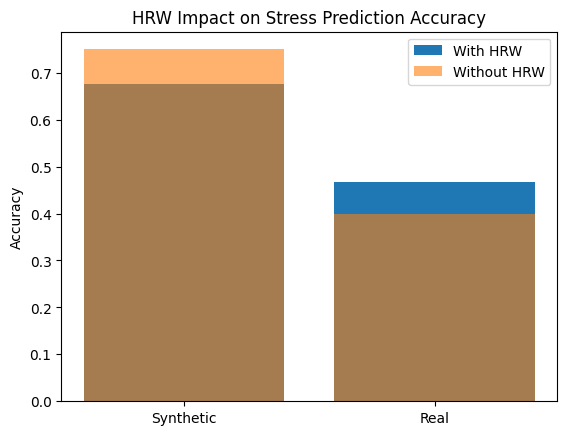

In [ ]:
# =======================================================
# LAB LAYER NOTEBOOK: HRW + Crop Stress Management
# =======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------------------------------
# 1. Synthetic HRW Experiment (Lab-like Simulation)
# -------------------------------------------------------

np.random.seed(42)
n_samples = 200

# Synthetic dataset with HRW treatment vs control
synthetic_data = pd.DataFrame({
    "crop_ID": np.random.choice(["Wheat", "Rice", "Maize", "Chilli"], size=n_samples),
    "soil_type": np.random.choice(["Sandy", "Clay", "Loamy"], size=n_samples),
    "Seedling_Stage": np.random.choice(["Early", "Mid", "Late"], size=n_samples),
    "MOI": np.random.uniform(0.2, 0.8, n_samples),   # moisture index
    "temp": np.random.uniform(20, 40, n_samples),
    "humidity": np.random.uniform(30, 90, n_samples),
    "HRW": np.random.choice([0, 1], size=n_samples), # 0 = normal water, 1 = HRW
})

# Stress outcome depends partly on HRW
synthetic_data["result"] = np.where(
    (synthetic_data["HRW"] == 1) & (synthetic_data["MOI"] > 0.5),
    "Healthy",
    np.random.choice(["Stressed", "Healthy"], size=n_samples)
)

print("✅ Synthetic dataset created:")
print(synthetic_data.head())

# -------------------------------------------------------
# 2. HRW vs Normal Validation
# -------------------------------------------------------

# Encode categorical features
synthetic_encoded = pd.get_dummies(
    synthetic_data.drop("result", axis=1), drop_first=True
)
y_synthetic = synthetic_data["result"]

X_train, X_test, y_train, y_test = train_test_split(
    synthetic_encoded, y_synthetic, test_size=0.2, random_state=42
)

clf_synthetic = RandomForestClassifier(random_state=42)
clf_synthetic.fit(X_train, y_train)

y_pred_synthetic = clf_synthetic.predict(X_test)
print("\n🔍 Validation Results on Synthetic HRW Data:")
print(classification_report(y_test, y_pred_synthetic))

# Compare accuracy with and without HRW
without_hrw = synthetic_encoded.drop("HRW", axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    without_hrw, y_synthetic, test_size=0.2, random_state=42
)

clf_no_hrw = RandomForestClassifier(random_state=42)
clf_no_hrw.fit(X_train2, y_train2)
y_pred_no_hrw = clf_no_hrw.predict(X_test2)

acc_with_hrw = accuracy_score(y_test, y_pred_synthetic)
acc_without_hrw = accuracy_score(y_test2, y_pred_no_hrw)

print(f"\n📊 Accuracy WITH HRW feature: {acc_with_hrw:.3f}")
print(f"📊 Accuracy WITHOUT HRW feature: {acc_without_hrw:.3f}")

# -------------------------------------------------------
# 3. Integration with Real Dataset
# -------------------------------------------------------

# Example real dataset (replace this with your actual CSV later)
real_data = pd.DataFrame({
    "crop ID": np.random.choice(["Wheat", "Rice", "Chilli"], 150),
    "soil_type": np.random.choice(["Sandy", "Clay"], 150),
    "Seedling Stage": np.random.choice(["Early", "Late"], 150),
    "MOI": np.random.uniform(0.2, 0.9, 150),
    "temp": np.random.uniform(22, 38, 150),
    "humidity": np.random.uniform(40, 85, 150),
    "result": np.random.choice(["Healthy", "Stressed"], 150)
})

# 🔹 Add simulated HRW feature
real_data["HRW"] = np.random.choice([0, 1], size=len(real_data))

print("\n✅ Real dataset sample with HRW added:")
print(real_data.head())

# Encode categorical
real_encoded = pd.get_dummies(real_data.drop("result", axis=1), drop_first=True)
y_real = real_data["result"]

X_train, X_test, y_train, y_test = train_test_split(
    real_encoded, y_real, test_size=0.2, random_state=42
)

clf_real = RandomForestClassifier(random_state=42)
clf_real.fit(X_train, y_train)
y_pred_real = clf_real.predict(X_test)

print("\n🔬 Real Dataset Results with HRW feature:")
print(classification_report(y_test, y_pred_real))

# Accuracy check with vs without HRW
without_hrw_real = real_encoded.drop("HRW", axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    without_hrw_real, y_real, test_size=0.2, random_state=42
)

clf_real_no_hrw = RandomForestClassifier(random_state=42)
clf_real_no_hrw.fit(X_train2, y_train2)
y_pred_real_no_hrw = clf_real_no_hrw.predict(X_test2)

acc_with_hrw_real = accuracy_score(y_test, y_pred_real)
acc_without_hrw_real = accuracy_score(y_test2, y_pred_real_no_hrw)

print(f"\n📊 Real Dataset Accuracy WITH HRW: {acc_with_hrw_real:.3f}")
print(f"📊 Real Dataset Accuracy WITHOUT HRW: {acc_without_hrw_real:.3f}")

# -------------------------------------------------------
# Visualization
# -------------------------------------------------------

plt.bar(["Synthetic", "Real"], [acc_with_hrw, acc_with_hrw_real], label="With HRW")
plt.bar(["Synthetic", "Real"], [acc_without_hrw, acc_without_hrw_real],
        alpha=0.6, label="Without HRW")
plt.ylabel("Accuracy")
plt.title("HRW Impact on Stress Prediction Accuracy")
plt.legend()
plt.show()
